# 04 – Capa Oro: Minería de Datos y Preparación para Clasificación

En esta notebook generamos la **Capa Oro**, donde los datos quedan listos para:

- Minería de datos: análisis avanzado, clustering, PCA, correlaciones.
- Preparación para métodos de clasificación supervisada.
- Exportación final para análisis o dashboards.

**Flujo:** Bronce → Plata → Oro


## 1. Carga de datasets de la Capa Plata

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Minería de datos: Clustering y PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# División train/test
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

PLATA_DIR = Path("../data/plata")
ORO_DIR = Path("../data/oro")
ORO_DIR.mkdir(parents=True, exist_ok=True)

archivo_horario = PLATA_DIR / "misiones_horario_imputado.csv"
archivo_diario = PLATA_DIR / "misiones_plata.csv"

df_horario = pd.read_csv(archivo_horario, parse_dates=["FECHA_HORA"])
df_diario = pd.read_csv(archivo_diario, parse_dates=["FECHA"])

print("Dataset horario imputado:", df_horario.shape)
print("Dataset diario:", df_diario.shape)

display(df_horario.head())
display(df_diario.head())

✅ Dataset horario imputado: (20145, 10)
✅ Dataset diario: (1095, 22)


,NOMBRE,FECHA_HORA,FECHA,HORA,TEMP,HUM,PNM,DD,FF,estacion_archivo
0,IGUAZU AERO,2024-06-01 00:00:00,2024-06-01,0,13.8,91.0,1019.6,90.0,7.0,20240601.0
1,IGUAZU AERO,2024-06-01 01:00:00,2024-06-01,1,13.4,92.0,1019.5,90.0,7.0,20240601.0
2,IGUAZU AERO,2024-06-01 02:00:00,2024-06-01,2,13.0,94.0,1019.0,90.0,11.0,20240601.0
3,IGUAZU AERO,2024-06-01 03:00:00,2024-06-01,3,12.8,94.0,1018.3,90.0,9.0,20240601.0
4,IGUAZU AERO,2024-06-01 04:00:00,2024-06-01,4,12.4,94.0,1018.3,90.0,7.0,20240601.0


,ESTACION,FECHA,TEMP_MEAN,TEMP_MIN,TEMP_MAX,PNM_MEAN,PNM_MIN,PNM_MAX,HUM_MEAN,HUM_MIN,...,WIND_DIR_MIN,WIND_DIR_MAX,WIND_SPEED_MEAN,WIND_SPEED_MIN,WIND_SPEED_MAX,TEMP_MEAN_NORM,PNM_MEAN_NORM,HUM_MEAN_NORM,WIND_DIR_MEAN_NORM,WIND_SPEED_MEAN_NORM
0,IGUAZU AERO,2024-06-01,16.3,10.5,22.8,1019.3,1017.8,1021.6,82.4,62,...,50,110,8.8,4,17,0.405797,0.599303,0.707641,0.187275,0.256410
1,IGUAZU AERO,2024-06-02,19.7,14.0,28.8,1017.1,1015.0,1018.7,77.6,51,...,20,110,8.2,4,15,0.528986,0.522648,0.627907,0.159664,0.234432
2,IGUAZU AERO,2024-06-03,20.2,16.4,25.6,1019.3,1018.0,1021.4,82.7,62,...,70,270,7.8,4,17,0.547101,0.599303,0.712625,0.437275,0.219780
3,IGUAZU AERO,2024-06-04,20.1,14.6,27.3,1018.5,1016.4,1020.2,83.6,61,...,0,990,6.2,0,11,0.543478,0.571429,0.727575,0.287815,0.161172
4,IGUAZU AERO,2024-06-05,21.5,18.2,27.2,1018.2,1015.9,1020.7,80.0,56,...,20,110,8.0,4,13,0.594203,0.560976,0.667774,0.164766,0.227106


## 2. Generación de variables derivadas

In [9]:
# Variables diarias
df_diario['AMPLITUD_TERMICA'] = df_diario['TEMP_MAX'] - df_diario['TEMP_MIN']
df_diario['RANGO_PRESION'] = df_diario['PNM_MAX'] - df_diario['PNM_MIN']
df_diario['RANGO_HUMEDAD'] = df_diario['HUM_MAX'] - df_diario['HUM_MIN']
df_diario['RANGO_VIENTO'] = df_diario['WIND_SPEED_MAX'] - df_diario['WIND_SPEED_MIN']

# Variables horarias: deltas
df_horario = df_horario.sort_values(['NOMBRE', 'FECHA_HORA'])
df_horario['DELTA_TEMP'] = df_horario.groupby('NOMBRE')['TEMP'].diff()
df_horario['DELTA_HUM'] = df_horario.groupby('NOMBRE')['HUM'].diff()
df_horario['DELTA_PNM'] = df_horario.groupby('NOMBRE')['PNM'].diff()

display(df_diario.head())
display(df_horario.head())

,ESTACION,FECHA,TEMP_MEAN,TEMP_MIN,TEMP_MAX,PNM_MEAN,PNM_MIN,PNM_MAX,HUM_MEAN,HUM_MIN,...,WIND_SPEED_MAX,TEMP_MEAN_NORM,PNM_MEAN_NORM,HUM_MEAN_NORM,WIND_DIR_MEAN_NORM,WIND_SPEED_MEAN_NORM,AMPLITUD_TERMICA,RANGO_PRESION,RANGO_HUMEDAD,RANGO_VIENTO
0,IGUAZU AERO,2024-06-01,16.3,10.5,22.8,1019.3,1017.8,1021.6,82.4,62,...,17,0.405797,0.599303,0.707641,0.187275,0.256410,12.3,3.8,33,13
1,IGUAZU AERO,2024-06-02,19.7,14.0,28.8,1017.1,1015.0,1018.7,77.6,51,...,15,0.528986,0.522648,0.627907,0.159664,0.234432,14.8,3.7,40,11
2,IGUAZU AERO,2024-06-03,20.2,16.4,25.6,1019.3,1018.0,1021.4,82.7,62,...,17,0.547101,0.599303,0.712625,0.437275,0.219780,9.2,3.4,36,13
3,IGUAZU AERO,2024-06-04,20.1,14.6,27.3,1018.5,1016.4,1020.2,83.6,61,...,11,0.543478,0.571429,0.727575,0.287815,0.161172,12.7,3.8,38,11
4,IGUAZU AERO,2024-06-05,21.5,18.2,27.2,1018.2,1015.9,1020.7,80.0,56,...,13,0.594203,0.560976,0.667774,0.164766,0.227106,9.0,4.8,38,9


,NOMBRE,FECHA_HORA,FECHA,HORA,TEMP,HUM,PNM,DD,FF,estacion_archivo,DELTA_TEMP,DELTA_HUM,DELTA_PNM
0,IGUAZU AERO,2024-06-01 00:00:00,2024-06-01,0,13.8,91.0,1019.6,90.0,7.0,20240601.0,NaN,NaN,NaN
1,IGUAZU AERO,2024-06-01 01:00:00,2024-06-01,1,13.4,92.0,1019.5,90.0,7.0,20240601.0,-0.4,1.0,-0.1
2,IGUAZU AERO,2024-06-01 02:00:00,2024-06-01,2,13.0,94.0,1019.0,90.0,11.0,20240601.0,-0.4,2.0,-0.5
3,IGUAZU AERO,2024-06-01 03:00:00,2024-06-01,3,12.8,94.0,1018.3,90.0,9.0,20240601.0,-0.2,0.0,-0.7
4,IGUAZU AERO,2024-06-01 04:00:00,2024-06-01,4,12.4,94.0,1018.3,90.0,7.0,20240601.0,-0.4,0.0,0.0


## 3. Exploración visual y correlaciones

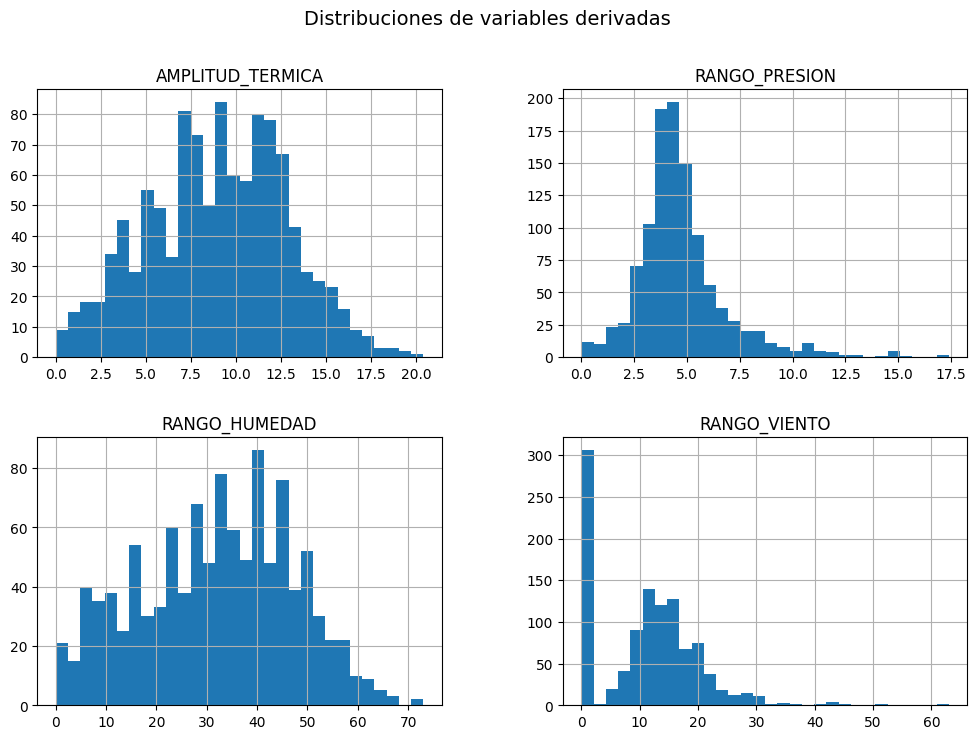

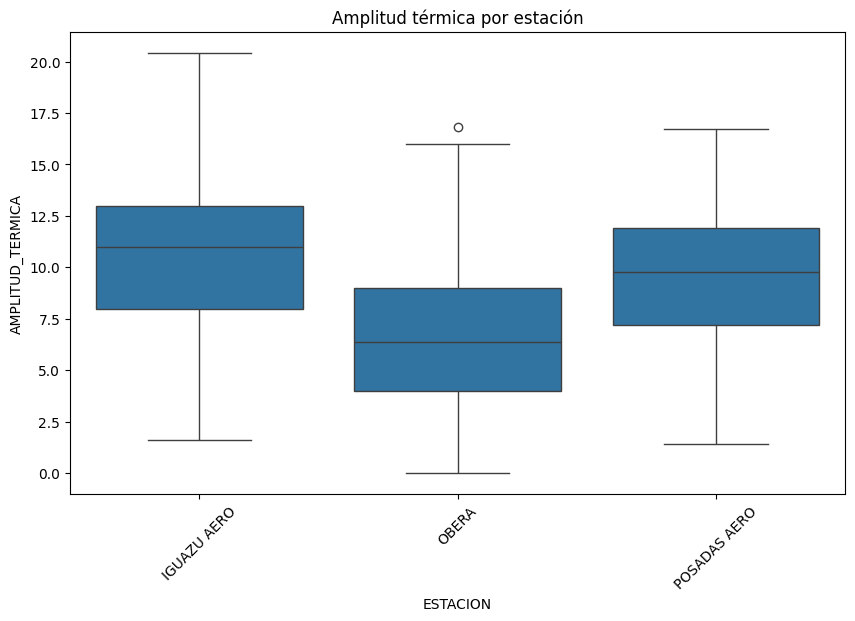

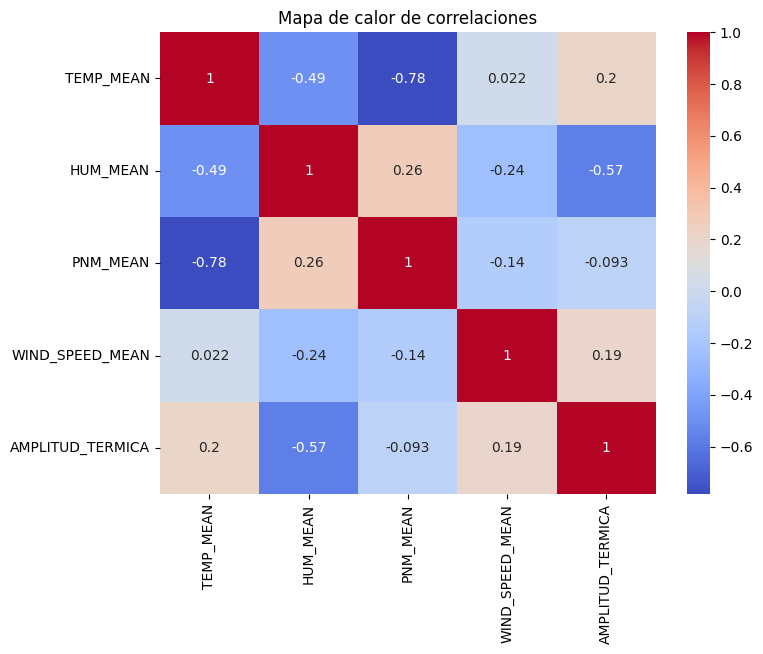

In [10]:
# Histogramas
variables = ['AMPLITUD_TERMICA', 'RANGO_PRESION', 'RANGO_HUMEDAD', 'RANGO_VIENTO']
df_diario[variables].hist(bins=30, figsize=(12,8))
plt.suptitle("Distribuciones de variables derivadas", fontsize=14)
plt.show()

# Boxplot por estación
plt.figure(figsize=(10,6))
sns.boxplot(x='ESTACION', y='AMPLITUD_TERMICA', data=df_diario)
plt.title('Amplitud térmica por estación')
plt.xticks(rotation=45)
plt.show()

# Correlaciones
plt.figure(figsize=(8,6))
sns.heatmap(df_diario[['TEMP_MEAN','HUM_MEAN','PNM_MEAN','WIND_SPEED_MEAN','AMPLITUD_TERMICA']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

## 4. Minería de datos: Clustering y PCA

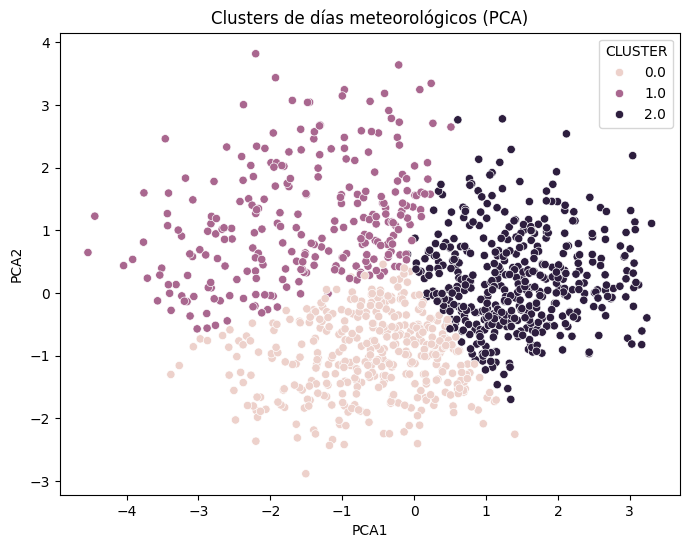

In [11]:
# Seleccionar variables para clustering
vars_cluster = ['TEMP_MEAN','HUM_MEAN','PNM_MEAN','WIND_SPEED_MEAN','AMPLITUD_TERMICA']
X = df_diario[vars_cluster].dropna()

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_diario.loc[X.index, 'CLUSTER'] = kmeans.fit_predict(X_scaled)

# PCA para visualización 2D
pca = PCA(n_components=2)
coords = pca.fit_transform(X_scaled)
df_diario.loc[X.index, 'PCA1'] = coords[:,0]
df_diario.loc[X.index, 'PCA2'] = coords[:,1]

# Graficar clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='CLUSTER', data=df_diario)
plt.title('Clusters de días meteorológicos (PCA)')
plt.show()

## 5. Preparación de datos para clasificación supervisada

In [13]:
# Crear etiqueta binaria de evento de viento fuerte como ejemplo
df_diario['EVENTO_VIENTO_FUERTE'] = df_diario['WIND_SPEED_MAX'] > 20

vars_modelo = ['TEMP_MEAN','HUM_MEAN','PNM_MEAN','WIND_SPEED_MEAN','AMPLITUD_TERMICA']
X = df_diario[vars_modelo].fillna(0)
y = df_diario['EVENTO_VIENTO_FUERTE'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[184   2]
 [ 24   9]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       186
           1       0.82      0.27      0.41        33

    accuracy                           0.88       219
   macro avg       0.85      0.63      0.67       219
weighted avg       0.87      0.88      0.85       219



## 6. Exportación de la Capa Oro enriquecida

In [14]:
ORO_DIR = Path("../data/oro")
ORO_DIR.mkdir(parents=True, exist_ok=True)

df_diario.to_csv(ORO_DIR / "misiones_oro_diario.csv", index=False)
df_diario.to_parquet(ORO_DIR / "misiones_oro_diario.parquet", index=False)

df_horario.to_csv(ORO_DIR / "misiones_oro_horario.csv", index=False)
df_horario.to_parquet(ORO_DIR / "misiones_oro_horario.parquet", index=False)

print("Capa Oro exportada con variables derivadas, clustering y etiqueta de ejemplo para clasificación.")

✅ Capa Oro exportada con variables derivadas, clustering y etiqueta de ejemplo para clasificación.


## 7. Conclusiones

En esta notebook generamos la **Capa Oro** con:

- Variables derivadas y categorizadas
- Gráficos exploratorios y correlaciones
- Clustering y PCA para minería de datos
- Preparación para clasificación supervisada

Este dataset queda listo para análisis avanzado, dashboards y modelado predictivo.
